# Top 5 Leagues Historical Goals: Statistical Insight

## Top 5 Leagues Historical Goals: France recent increase in goals

### Import relevant libraries

In [42]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Load the CSV file with the data

In [43]:
# Read Top 5 Leagues 25 Countries CSV file
df = pd.read_csv(r"C:\Users\jprey\OneDrive\Escritorio\JP\KUL\5th Semester (Polimi)\MIT IDSS\Practice Projects\Top 5 Leagues\top_5_leagues_25_countries_cumulative.csv")

# Create a sub-dataframe that includes only the 5 nations with the most overall goals between 2004-2014
previous_ten_years = df.iloc[:5, [0,42,43,44,45,46,47,48,49,50,51]]
# Add a column with its mean
previous_ten_years['Mean'] = previous_ten_years.iloc[:, 1:].mean(axis=1)

# Create a sub-dataframe that includes only the 5 nations with the most overall goals between 2014-2024
this_ten_years = df.iloc[:5,[0,52,53,54,55,56,57,58,59,60,61]]
# Add a column with its mean
this_ten_years['Mean'] = this_ten_years.iloc[:, 1:].mean(axis=1)


In [44]:
previous_ten_years

,Countries,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,Mean
0,Germany,317,327,302,292,295,312,348,365,437,390,338.5
1,England,367,355,323,327,310,342,320,323,290,320,327.7
2,France,482,438,443,519,503,457,467,507,584,531,493.1
3,Spain,513,491,457,500,587,574,513,546,626,619,542.6
4,Italy,635,626,673,664,616,569,522,475,488,474,574.2


In [45]:
this_ten_years

,Countries,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,Mean
0,Germany,370,360,360,390,384,364,351,365,419,440,380.3
1,England,297,297,291,275,284,366,372,358,387,459,338.6
2,France,514,552,603,515,614,493,614,700,681,568,585.4
3,Spain,556,573,647,584,608,600,613,618,503,546,584.8
4,Italy,433,439,472,431,417,424,374,392,310,321,401.3


### Extract the data relevant to France

In [46]:
# Extract the France values for the seasons 2004-2014 in a dataframe
france_previous_ten_years = previous_ten_years.iloc[2:3, [1,2,3,4,5,6,7,8,9,10]].iloc[0]
# Extract the France values for the seasons 2014-2024 in a dataframe
france_this_ten_years = this_ten_years.iloc[2:3, [1,2,3,4,5,6,7,8,9,10]].iloc[0]

### T-test for two samples

We want to perform a t-test for two samples to check whether the mean goals of France have increased in this last 10 years compared to the previous last 10 years (2004-2014). To do so, we have to make sure that:
- The samples are independent between each other and random
    - This is true because each year has different goals that do not depend on historical data. Moreover, the goals scored per season can be approximated to random since they depend on the players' performance year by year.
- The samples are assumed to be normally distributed
    - A Shapiro-Wilk test will be performed to determine this.
- The variances are equal.
    - Levene's test can be performed to determine this.

**We will consider a level of significance of 0.01**

In [47]:
alpha = 0.05

#### Assess for normality: Shapiro-Wilk test
For each sample: if the p-value is higher than alpha, then the null hypothesis stating that the sample follows a normal distribution cannot be rejected, i.e., the sample is normally distributed if p-value > alpha.

In [48]:
# Shapiro test parameters for the previous last ten years (2004-2014)
shapiro_france_previous_ten_years = stats.shapiro(france_previous_ten_years)
p_value_previous_ten_years = shapiro_france_previous_ten_years.pvalue
print("Shapiro-Wilk Test for France's goals from 2004 to 2014: W =", shapiro_france_previous_ten_years.statistic, ", p-value =", p_value_previous_ten_years)

# Shapiro test parameters for this last ten years (2014-2024)
shapiro_france_this_ten_years = stats.shapiro(france_this_ten_years)
p_value_this_ten_years = shapiro_france_this_ten_years.pvalue
print("Shapiro-Wilk Test for France's goals from 2014 to 2024: W =", shapiro_france_this_ten_years.statistic, ", p-value =", p_value_this_ten_years)

# Conclusion
print("Both samples are normally distributed?", p_value_previous_ten_years > alpha and p_value_this_ten_years > alpha)



Shapiro-Wilk Test for France's goals from 2004 to 2014: W = 0.8888754115000584 , p-value = 0.16469646383181613
Shapiro-Wilk Test for France's goals from 2014 to 2024: W = 0.8486407461067194 , p-value = 0.05596453637699255
Both samples are normally distributed? True


##### Therefore, the samples are normally distributed.

#### Assess for equal variances: Levene's test
We execute the test simultaneously for both samples: if the p-value is higher than alpha, then the null hypothesis stating that the variances of the samples are equal cannot be rejected, i.e., the samples' variances are equal if p-value > alpha.

In [49]:
# We execute Levene's test using our two datasets.
levene_test = stats.levene(france_previous_ten_years, france_this_ten_years)
p_value_levene_test = levene_test.pvalue
print("Levene's Test for both samples: Statistic =", levene_test.statistic, ", p-value =", p_value_levene_test)

# Conclusion
print("Both samples' variances are equal?", p_value_levene_test > alpha)

Levene's Test for both samples: Statistic = 1.2499201876404857 , p-value = 0.27826759744595203
Both samples' variances are equal? True


##### Therefore, the samples' variances are equal.

#### The samples are independent, randomly selected, uniformly distributed and have equal variances.

### Let's perform the t-test for two samples
- **Null Hypothesis (H<sub>0</sub>)**: μ<sub>previous</sub> >= μ<sub>this</sub> (the mean of the goals scored by French players in the top 5 European Football Leagues between the seasons 2003-2024 and 2013-2024 is greater than or equal to the mean of the seasons 2013-2014 to 2023-2024)
- **Alternative Hypothesis (H<sub>a</sub>)**: μ<sub>previous</sub> < μ<sub>this</sub> (the mean of the goals scored by French players in the top 5 European Football Leagues between the seasons 2003-2024 and 2013-2024 is less than the mean of the seasons 2013-2014 to 2023-2024)

In [54]:
t_statistic, p_value = stats.ttest_ind(france_previous_ten_years, france_this_ten_years, alternative="less")
print("p-value =", p_value)
print("Reject the null hypothesis in favor of the alternative hypothesis?",p_value < alpha)

p-value = 0.01369855927071434
Reject the null hypothesis in favor of the alternative hypothesis? True


### We are Sure with a 99% Confidence Level that the mean of goals scored of French players in Europe Top 5 Football leagues has increased in this last 10 years with resepct to the previous last 10 years (2004-2014)

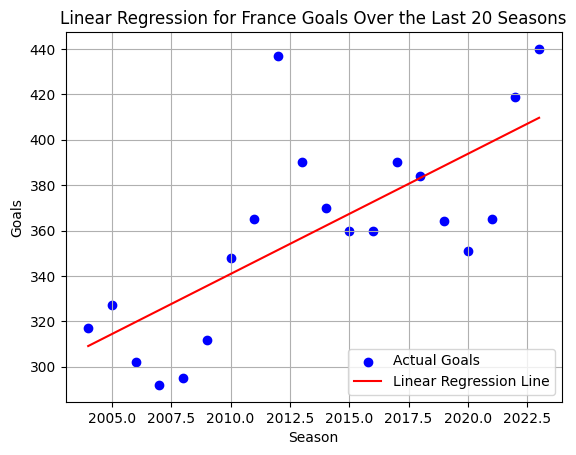

Slope: 5.291729323308271
Intercept: -10295.496992481203
R-value: 0.7189648444044795
P-value: 0.00035425383688595123


In [51]:
france_20_years = pd.concat([france_previous_ten_years, france_this_ten_years])
seasons = np.array(range(2004,2024))
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(seasons, france_20_years)

# Predict future goals using the model
predicted_goals = intercept + slope * seasons

# Plot the results
plt.scatter(seasons, france_20_years, color='blue', label='Actual Goals')
plt.plot(seasons, predicted_goals, color='red', label='Linear Regression Line')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.title('Linear Regression for France Goals Over the Last 20 Seasons')
plt.legend()
plt.grid()
plt.show()

# Display the slope and intercept
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")

In [52]:
print(pd.concat([france_previous_ten_years, france_this_ten_years]))

2004-2005    317
2005-2006    327
2006-2007    302
2007-2008    292
2008-2009    295
2009-2010    312
2010-2011    348
2011-2012    365
2012-2013    437
2013-2014    390
2014-2015    370
2015-2016    360
2016-2017    360
2017-2018    390
2018-2019    384
2019-2020    364
2020-2021    351
2021-2022    365
2022-2023    419
2023-2024    440
Name: 0, dtype: int64


## Top 5 Leagues Historical Goals: France vs Germany

### Let's predict when is France surpassing Germany.

In [ ]:
germany_previous_ten_years = previous_ten_years.iloc[0:1, [1,2,3,4,5,6,7,8,9,10]].iloc[0]
germany_this_ten_years = this_ten_years.iloc[0:1, [1,2,3,4,5,6,7,8,9,10]].iloc[0]